In [ ]:
!pip install fbprophet

In [193]:
import timeit
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime as dt

In [421]:
df = pd.read_csv('https://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv')

In [422]:
ar = df[df.StateName == 'AR']

dropCol = []
for i in [0,1,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  dropCol.append(ar.columns[i])

ar = ar.drop(columns = dropCol)
ar = pd.melt(ar, id_vars=['RegionName','Metro'], var_name='Date', value_name='Value')
hot = ar[ar.Metro == 'Hot Springs']
little = ar[ar.Metro == 'Little Rock-North Little Rock-Conway']
fay = ar[ar.Metro == 'Fayetteville-Springdale-Rogers']
sea = ar[ar.Metro == 'Searcy']

In [423]:
hot = hot.groupby(['Date'])['Value'].agg(lambda x: x.unique().mean())
hot = pd.DataFrame(hot)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Hot Springs Arkansas Home Value 1997-2020')

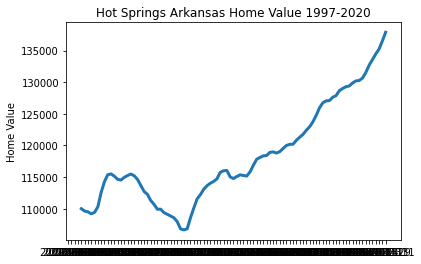

In [424]:
ax = plt.subplot()
ax.plot(hot['Value'], linewidth=3)
ax.set_ylabel('Home Value')
ax.set_title('Hot Springs Arkansas Home Value 1997-2020')

In [425]:
little = little.groupby(['Date'])['Value'].agg(lambda x: x.unique().mean())
little = pd.DataFrame(little)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Little Rock Arkansas Home Value 1997-2020')

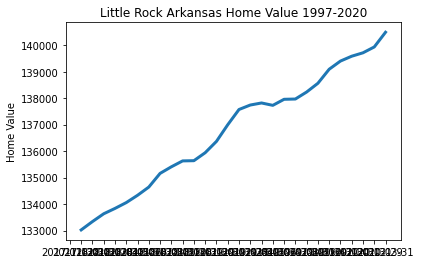

In [426]:
ax = plt.subplot()
ax.plot(little['Value'], linewidth=3)
ax.set_ylabel('Home Value')
ax.set_title('Little Rock Arkansas Home Value 1997-2020')

In [427]:
fay = fay.groupby(['Date'])['Value'].agg(lambda x: x.unique().mean())
fay = pd.DataFrame(fay)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Fayetteville Arkansas Home Value 1997-2020')

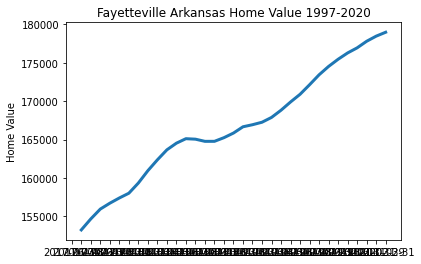

In [428]:
ax = plt.subplot()
ax.plot(fay['Value'], linewidth=3)
ax.set_ylabel('Home Value')
ax.set_title('Fayetteville Arkansas Home Value 1997-2020')

In [429]:
sea = sea.groupby(['Date'])['Value'].agg(lambda x: x.unique().mean())
sea = pd.DataFrame(sea)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Searcy Arkansas Home Value 1997-2020')

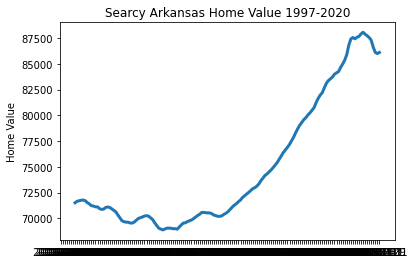

In [430]:
ax = plt.subplot()
ax.plot(sea['Value'], linewidth=3)
ax.set_ylabel('Home Value')
ax.set_title('Searcy Arkansas Home Value 1997-2020')

In [431]:
# SCRUB - TEMPORARY
# DROP MAJORITY OF DATA FOR TESTING
df = df[:-29364]
len(df)

1100

In [432]:
dates = df.columns[21:300]
dropCols = []
for i in [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  dropCols.append(df.columns[i])

In [433]:
zdf = df.drop(columns = dropCols)
zdf = zdf.iloc[1:]

In [434]:
zdf = pd.melt(zdf, id_vars='RegionName', var_name='ds', value_name='y')

In [435]:
zdf.ds = pd.to_datetime(zdf.ds, infer_datetime_format=True)

In [436]:
zdf.rename(columns={'RegionName' : 'Zip'}, inplace=True)

In [437]:
cols = list(zdf)
cols.insert(2, cols.pop(cols.index('Zip')))
zdf = zdf.loc[:,cols]

In [438]:
train = zdf[zdf.ds < dt.datetime(2018,1,1,0,0,0)]

In [439]:
zforecast = {}
list_zips = train.Zip.unique()

for Zip in list_zips:
  zipdf = train.loc[train['Zip'] == Zip]
  model = Prophet(interval_width=0.95)
  model.fit(zipdf)
  future_dates = model.make_future_dataframe(periods=27, freq='M')
  forecast = model.predict(future_dates)
  zforecast[Zip] = forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [440]:
fdf = []
for k,v in zforecast.items():
  v.insert(1, "Zip", [k]*len(v))
  fdf.append(v)

In [441]:
fdf = pd.concat(fdf, ignore_index=True)

In [442]:
fdf

,ds,Zip,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-31,60657,"372,552.48","355,906.78","394,224.56","372,552.48","372,552.48","2,818.89","2,818.89","2,818.89","2,818.89","2,818.89","2,818.89",0.00,0.00,0.00,"375,371.37"
1,1997-02-28,60657,"373,499.00","356,107.36","393,086.85","373,499.00","373,499.00",588.33,588.33,588.33,588.33,588.33,588.33,0.00,0.00,0.00,"374,087.33"
2,1997-03-31,60657,"374,546.95","354,700.27","394,525.16","374,546.95","374,546.95","1,090.84","1,090.84","1,090.84","1,090.84","1,090.84","1,090.84",0.00,0.00,0.00,"375,637.79"
3,1997-04-30,60657,"375,561.08","357,522.24","396,656.62","375,561.08","375,561.08","1,469.08","1,469.08","1,469.08","1,469.08","1,469.08","1,469.08",0.00,0.00,0.00,"377,030.16"
4,1997-05-31,60657,"376,609.03","360,471.16","397,689.62","376,609.03","376,609.03","2,092.26","2,092.26","2,092.26","2,092.26","2,092.26","2,092.26",0.00,0.00,0.00,"378,701.29"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306616,2019-11-30,85711,"165,877.06","141,818.37","186,891.53","142,535.37","185,814.68",404.92,404.92,404.92,404.92,404.92,404.92,0.00,0.00,0.00,"166,281.98"
306617,2019-12-31,85711,"166,441.14","142,753.62","187,372.41","141,866.55","187,553.64",83.60,83.60,83.60,83.60,83.60,83.60,0.00,0.00,0.00,"166,524.74"
306618,2020-01-31,85711,"167,005.22","140,279.55","190,060.64","140,696.90","189,145.21",-527.28,-527.28,-527.28,-527.28,-527.28,-527.28,0.00,0.00,0.00,"166,477.94"
306619,2020-02-29,85711,"167,532.91","138,331.89","191,336.86","139,385.30","191,493.84",-292.93,-292.93,-292.93,-292.93,-292.93,-292.93,0.00,0.00,0.00,"167,239.98"


In [470]:
last_sample_date = "2017-12-31"
last_predicted_date = "2020-03-31"
lsd = zdf.loc[zdf['ds'] == last_sample_date, 'y']
lpd = fdf.loc[fdf['ds'] == last_predicted_date, 'yhat']
ald = zdf.loc[zdf['ds'] == last_predicted_date, 'y']
lsd = pd.DataFrame(lsd)
lpd = pd.DataFrame(lpd)

In [478]:
gdf = fdf.Zip.unique()
gdf = pd.DataFrame(gdf)
gdf.rename(columns={0 : 'Zip'}, inplace=True)
gdf['Predicted'] = lpd['yhat'].values
gdf['Current'] = lsd['y'].values
gdf['ProjectedGrowth'] = gdf['Predicted'] - gdf['Current']

In [445]:
def percentage_change(col1,col2):
  return ((col2 - col1) / col1) * 100

In [481]:
gdf['ProjectedPercent'] = percentage_change(gdf['Current'],gdf['Predicted'])

In [482]:
pd.options.display.float_format = "{:,.2f}".format

In [483]:
gdf

,Zip,Predicted,Current,ProjectedGrowth,ProjectedPercent
0,60657,"1,069,844.57","958,428.00","111,416.57",11.62
1,10023,"1,674,626.88","1,581,756.00","92,870.88",5.87
2,77494,"377,329.96","332,171.00","45,158.96",13.60
3,60614,"1,346,231.46","1,202,485.00","143,746.46",11.95
4,77449,"206,350.47","173,594.00","32,756.47",18.87
...,...,...,...,...,...
1094,91744,"518,273.16","463,469.00","54,804.16",11.82
1095,43224,"113,793.35","100,447.00","13,346.35",13.29
1096,30093,"195,872.97","161,622.00","34,250.97",21.19
1097,30518,"270,395.33","245,397.00","24,998.33",10.19


In [485]:
gdf.nlargest(3, 'ProjectedGrowth')

,Zip,Predicted,Current,ProjectedGrowth,ProjectedPercent
325,10021,"9,247,894.29","7,582,524.00","1,665,370.29",21.96
18,11201,"4,096,498.76","3,320,614.00","775,884.76",23.37
603,10014,"6,907,651.06","6,174,937.00","732,714.06",11.87


In [452]:
zdf1 = train[train['Zip'] == 11216]
zdf2 = train[train['Zip'] == 11225]
zdf3 = train[train['Zip'] == 11221]

In [457]:
zdf3

,ds,y,Zip
65,1997-01-31,"235,924.00",11221
1164,1997-02-28,"236,853.00",11221
2263,1997-03-31,"238,884.00",11221
3362,1997-04-30,"240,448.00",11221
4461,1997-05-31,"242,941.00",11221
...,...,...,...
271518,2017-08-31,"1,094,968.00",11221
272617,2017-09-30,"1,103,634.00",11221
273716,2017-10-31,"1,116,453.00",11221
274815,2017-11-30,"1,127,341.00",11221


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


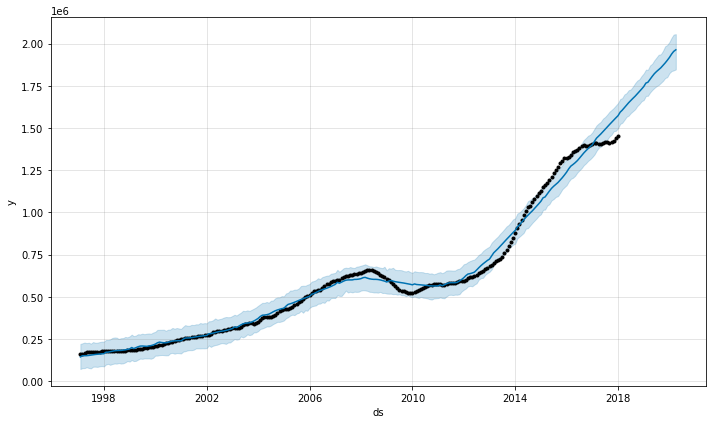

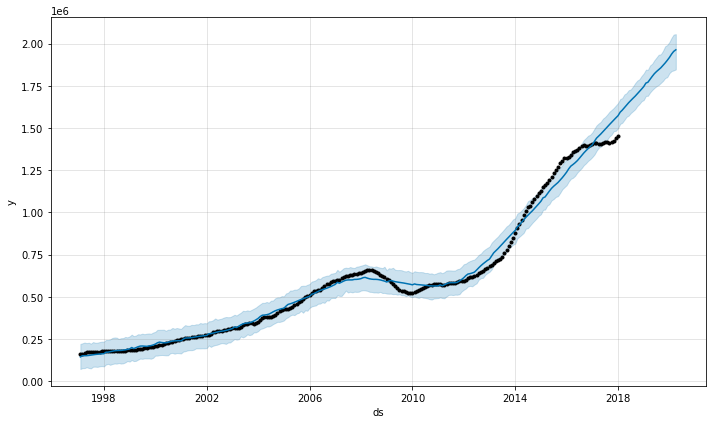

In [464]:
model = Prophet(interval_width=0.95)
model.fit(zdf1)
future_dates = model.make_future_dataframe(periods=27, freq='M')
forecast = model.predict(future_dates)
model.plot(forecast)

In [465]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-31,"145,499.79","71,506.75","220,394.70","145,499.79","145,499.79","-1,956.89","-1,956.89","-1,956.89","-1,956.89","-1,956.89","-1,956.89",0.00,0.00,0.00,"143,542.90"
1,1997-02-28,"147,458.72","76,865.16","223,824.18","147,458.72","147,458.72","2,712.70","2,712.70","2,712.70","2,712.70","2,712.70","2,712.70",0.00,0.00,0.00,"150,171.42"
2,1997-03-31,"149,627.53","77,122.81","228,507.44","149,627.53","149,627.53",583.67,583.67,583.67,583.67,583.67,583.67,0.00,0.00,0.00,"150,211.20"
3,1997-04-30,"151,726.39","82,173.21","225,190.40","151,726.39","151,726.39",-858.28,-858.28,-858.28,-858.28,-858.28,-858.28,0.00,0.00,0.00,"150,868.10"
4,1997-05-31,"153,895.20","77,834.24","227,649.57","153,895.20","153,895.20","-1,683.86","-1,683.86","-1,683.86","-1,683.86","-1,683.86","-1,683.86",0.00,0.00,0.00,"152,211.34"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2019-11-30,"1,903,984.99","1,800,633.15","1,991,214.67","1,835,828.56","1,965,392.63","-3,804.52","-3,804.52","-3,804.52","-3,804.52","-3,804.52","-3,804.52",0.00,0.00,0.00,"1,900,180.47"
275,2019-12-31,"1,918,402.63","1,824,313.11","2,008,853.63","1,845,371.83","1,983,523.81","-1,035.96","-1,035.96","-1,035.96","-1,035.96","-1,035.96","-1,035.96",0.00,0.00,0.00,"1,917,366.67"
276,2020-01-31,"1,932,820.26","1,836,897.63","2,034,490.87","1,855,459.13","2,001,856.60","4,749.28","4,749.28","4,749.28","4,749.28","4,749.28","4,749.28",0.00,0.00,0.00,"1,937,569.54"
277,2020-02-29,"1,946,307.73","1,840,797.84","2,053,117.37","1,864,818.35","2,019,289.19","6,818.60","6,818.60","6,818.60","6,818.60","6,818.60","6,818.60",0.00,0.00,0.00,"1,953,126.33"


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


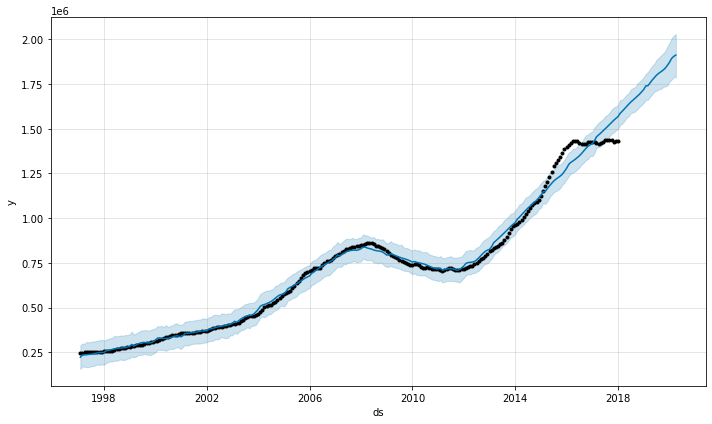

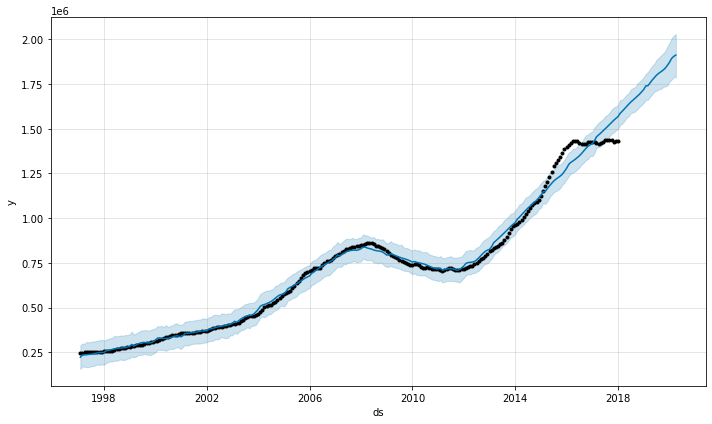

In [466]:
model = Prophet(interval_width=0.95)
model.fit(zdf2)
future_dates = model.make_future_dataframe(periods=27, freq='M')
forecast = model.predict(future_dates)
model.plot(forecast)

In [467]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-31,"230,303.76","156,001.71","288,528.30","230,303.76","230,303.76","-7,733.51","-7,733.51","-7,733.51","-7,733.51","-7,733.51","-7,733.51",0.00,0.00,0.00,"222,570.25"
1,1997-02-28,"232,630.21","170,457.29","299,043.92","232,630.21","232,630.21","1,813.13","1,813.13","1,813.13","1,813.13","1,813.13","1,813.13",0.00,0.00,0.00,"234,443.34"
2,1997-03-31,"235,205.92","168,938.30","297,685.44","235,205.92","235,205.92",-204.90,-204.90,-204.90,-204.90,-204.90,-204.90,0.00,0.00,0.00,"235,001.03"
3,1997-04-30,"237,698.55","166,965.72","307,449.73","237,698.55","237,698.55","-1,513.86","-1,513.86","-1,513.86","-1,513.86","-1,513.86","-1,513.86",0.00,0.00,0.00,"236,184.69"
4,1997-05-31,"240,274.26","167,477.87","304,933.49","240,274.26","240,274.26","-2,681.17","-2,681.17","-2,681.17","-2,681.17","-2,681.17","-2,681.17",0.00,0.00,0.00,"237,593.09"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2019-11-30,"1,860,842.95","1,741,599.99","1,958,319.13","1,765,894.64","1,940,907.34","-6,992.82","-6,992.82","-6,992.82","-6,992.82","-6,992.82","-6,992.82",0.00,0.00,0.00,"1,853,850.12"
275,2019-12-31,"1,873,413.63","1,763,914.93","1,979,308.03","1,772,114.94","1,959,187.85","-2,073.11","-2,073.11","-2,073.11","-2,073.11","-2,073.11","-2,073.11",0.00,0.00,0.00,"1,871,340.52"
276,2020-01-31,"1,885,984.31","1,775,155.05","2,006,188.83","1,779,920.24","1,977,420.45","7,474.60","7,474.60","7,474.60","7,474.60","7,474.60","7,474.60",0.00,0.00,0.00,"1,893,458.91"
277,2020-02-29,"1,897,743.97","1,788,784.13","2,020,779.03","1,786,758.73","1,994,458.43","6,927.53","6,927.53","6,927.53","6,927.53","6,927.53","6,927.53",0.00,0.00,0.00,"1,904,671.50"


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


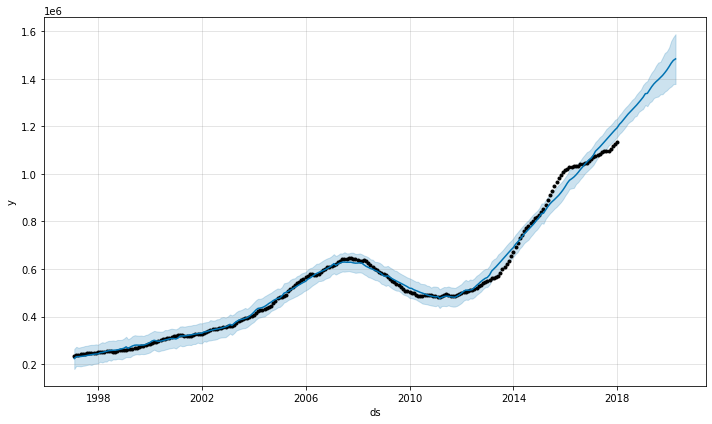

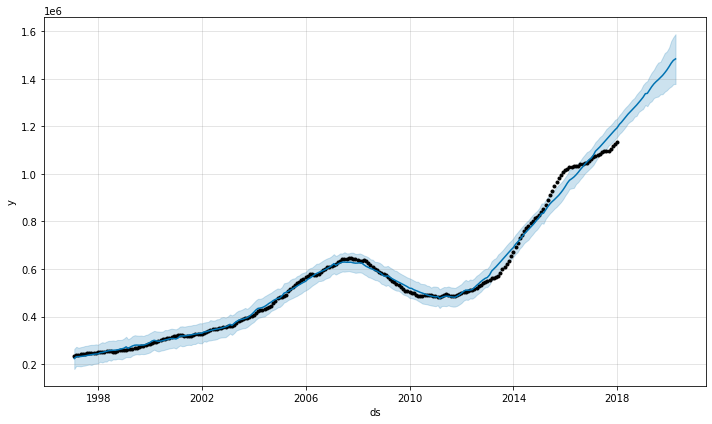

In [468]:
model = Prophet(interval_width=0.95)
model.fit(zdf3)
future_dates = model.make_future_dataframe(periods=27, freq='M')
forecast = model.predict(future_dates)
model.plot(forecast)

In [469]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-01-31,"228,277.25","179,132.80","263,756.45","228,277.25","228,277.25","-4,939.50","-4,939.50","-4,939.50","-4,939.50","-4,939.50","-4,939.50",0.00,0.00,0.00,"223,337.75"
1,1997-02-28,"229,932.02","192,013.77","272,705.09","229,932.02","229,932.02","1,209.43","1,209.43","1,209.43","1,209.43","1,209.43","1,209.43",0.00,0.00,0.00,"231,141.45"
2,1997-03-31,"231,764.08","191,459.09","268,667.84","231,764.08","231,764.08",-474.25,-474.25,-474.25,-474.25,-474.25,-474.25,0.00,0.00,0.00,"231,289.83"
3,1997-04-30,"233,537.05","190,534.60","271,036.64","233,537.05","233,537.05","-1,742.62","-1,742.62","-1,742.62","-1,742.62","-1,742.62","-1,742.62",0.00,0.00,0.00,"231,794.43"
4,1997-05-31,"235,369.11","192,806.19","273,025.31","235,369.11","235,369.11","-2,254.51","-2,254.51","-2,254.51","-2,254.51","-2,254.51","-2,254.51",0.00,0.00,0.00,"233,114.61"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2019-11-30,"1,440,548.28","1,351,521.47","1,514,886.86","1,357,914.96","1,517,019.88","-3,682.27","-3,682.27","-3,682.27","-3,682.27","-3,682.27","-3,682.27",0.00,0.00,0.00,"1,436,866.01"
275,2019-12-31,"1,451,243.69","1,361,336.36","1,531,246.33","1,363,423.65","1,533,161.13",-368.71,-368.71,-368.71,-368.71,-368.71,-368.71,0.00,0.00,0.00,"1,450,874.99"
276,2020-01-31,"1,461,939.11","1,367,730.66","1,559,363.16","1,368,843.92","1,548,726.75","4,070.67","4,070.67","4,070.67","4,070.67","4,070.67","4,070.67",0.00,0.00,0.00,"1,466,009.77"
277,2020-02-29,"1,471,944.49","1,377,175.57","1,574,677.28","1,373,271.26","1,563,573.09","5,263.75","5,263.75","5,263.75","5,263.75","5,263.75","5,263.75",0.00,0.00,0.00,"1,477,208.24"
